In [43]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
image = mpimg.imread('test_1.jpg')

In [44]:
#let's look onto size of image and type
print ("type of image",type(image),"shape", image.shape)

type of image <class 'numpy.ndarray'> shape (540, 960, 3)


<class 'numpy.ndarray'> (540, 960, 3)


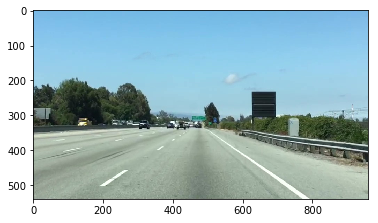

In [45]:
x = image.shape[0]
y = image.shape[1]

copy_image = np.copy(image)
print (type(copy_image), copy_image.shape)
plt.imshow(copy_image)

In [46]:
# I want a trianglure aria in this image to select only lane line area
bottom_left = [90, 540]
bottom_right = [830, 540]
top = [475, 320]

In [47]:
# make a triagle by projecting line y = Ax + B np.polyfir return A and B

left_line = np.polyfit((bottom_left[0], top[0]),(bottom_left[1], top[1]) , 1)
right_line = np.polyfit((bottom_right[0], top[0]),(bottom_right[1], top[1]), 1)
bottom_line = np.polyfit((bottom_left[0], bottom_right[0]),(bottom_left[1], bottom_right[1]), 1)

In [48]:
xx, yy = np.meshgrid(np.arange(0,y), np.arange(0,x))

In [49]:
region = (yy > xx*left_line[0] + left_line[1]) & \
         (yy > xx*right_line[0]+right_line[1]) &  \
         (yy < xx*top[0] + top[1]) 

In [50]:
print (region.shape, copy_image.shape)

(540, 960) (540, 960, 3)


In [51]:
copy_image[region] = [255,0,0]

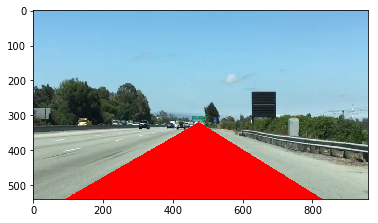

In [52]:
plt.imshow(copy_image)

In [53]:
# clolor masking 
color_thresold = [200,200,200]

color_region = (image[:,:,0] < color_thresold[0] ) | \
                (image[:,:,1] < color_thresold[1]) | \
                (image[:,:,2] < color_thresold[2])

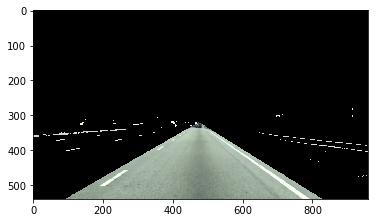

In [54]:
lane_lines = image.copy()
lane_lines[ color_region & ~ region ] = [0,0,0]
plt.imshow(lane_lines)